In [1]:
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=r"E:\Internship_Projects\Thyroid_Disease_Detection_ML\thyroid_detection\artifact\data_ingestion\2025-02-24-00-02-54\raw_data\allbp.csv"

In [3]:
df= pd.read_csv(df)

In [23]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'Class'],
      dtype='object')

In [4]:
#remove age value >150, that is present there in the data csv
df.loc[df['age'] > 150, 'age'] = np.nan
df.replace("?",pd.NA,inplace=True)

#remove unwanted attached symbols and numerics in target column (Class)
df["Class"] = df["Class"].astype(str).apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x).strip())
#drop unnecessary columns
df.drop(columns=["TBG","TSH measured","T3 measured","TT4 measured","T4U measured","FTI measured","TBG measured","referral source"], inplace=True)
#Convert 'Class' Column into Readable Labels
label_mapping = {
    'negative': 'negative',
    'increased binding protein': 'hyperthyroidism',
    'decreased binding protein': 'hypothyroidism'
}
df["Class"] = df["Class"].replace(label_mapping)

In [5]:
df.to_csv("processed_data.csv", index=False)


In [6]:
df.isnull().sum()

age                            2
sex                          110
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          284
T3                           585
TT4                          184
T4U                          297
FTI                          295
Class                          0
dtype: int64

In [7]:
df1=pd.read_csv("processed_data.csv")

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

In [9]:
df1=pd.read_csv("processed_data.csv")

target_column= "Class"
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df1, df1[target_column]):
    train_set = df1.loc[train_index]
    test_set = df1.loc[test_index]

print("Train set class distribution:\n", train_set[target_column].value_counts(normalize=True))
print("\nTest set class distribution:\n", test_set[target_column].value_counts(normalize=True))

train_set.to_csv("train_data.csv", index=False)
test_set.to_csv("test_data.csv", index=False)

Train set class distribution:
 negative           0.952679
hyperthyroidism    0.044196
hypothyroidism     0.003125
Name: Class, dtype: float64

Test set class distribution:
 negative           0.951786
hyperthyroidism    0.044643
hypothyroidism     0.003571
Name: Class, dtype: float64


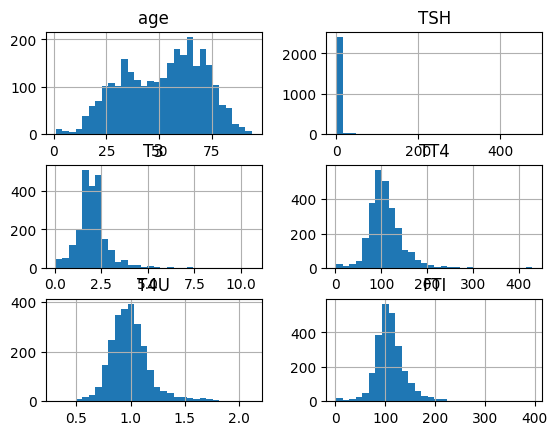

In [10]:
df.hist(bins=30)
plt.show()

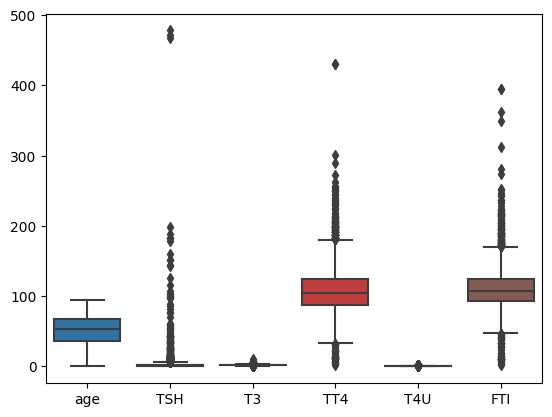

In [11]:
sns.boxplot(data=df)
plt.show()

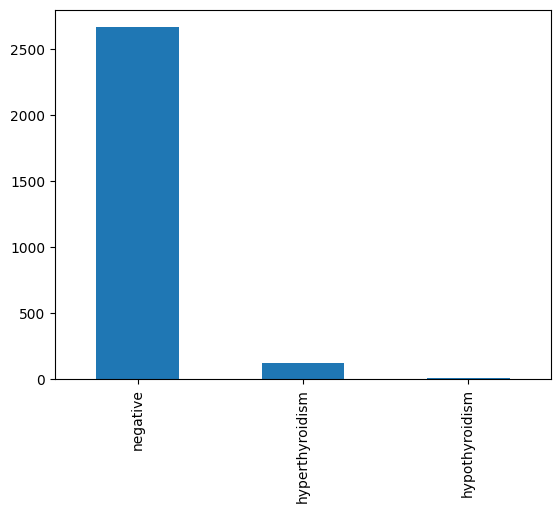

In [12]:

df["Class"].value_counts().plot(kind = "bar")
plt.show()

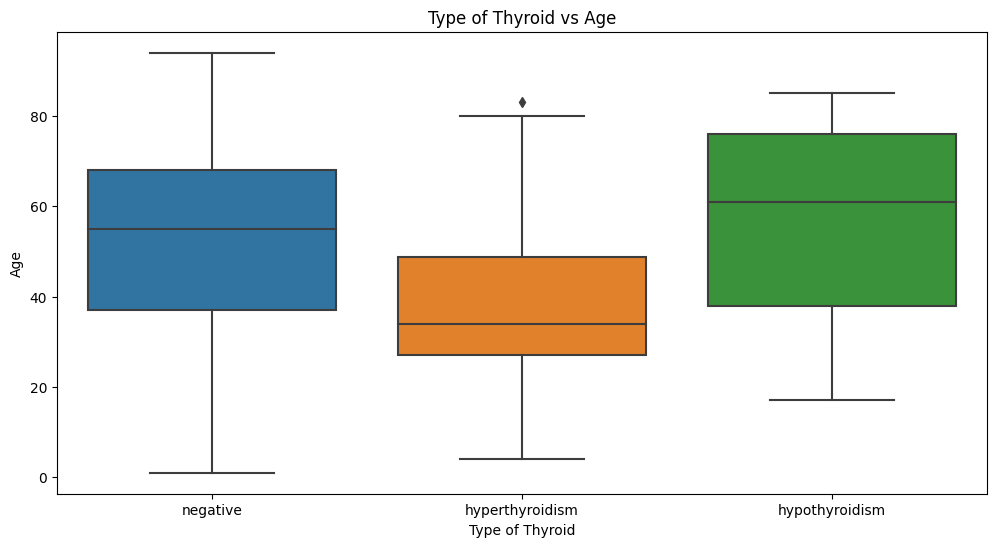

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(x = "Class", y = "age", data = df)
plt.title("Type of Thyroid vs Age")
plt.xlabel("Type of Thyroid")
plt.ylabel("Age")
plt.show()

<AxesSubplot:>

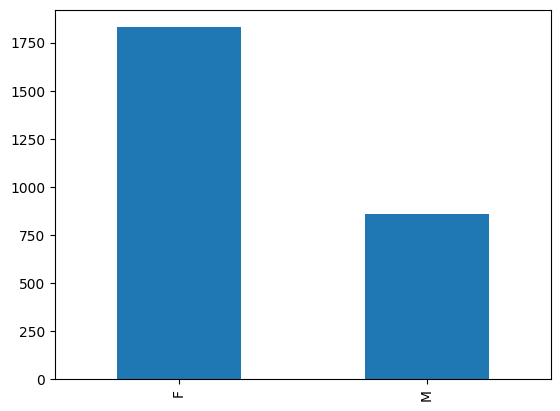

In [14]:
df["sex"].value_counts().plot(kind = "bar")

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

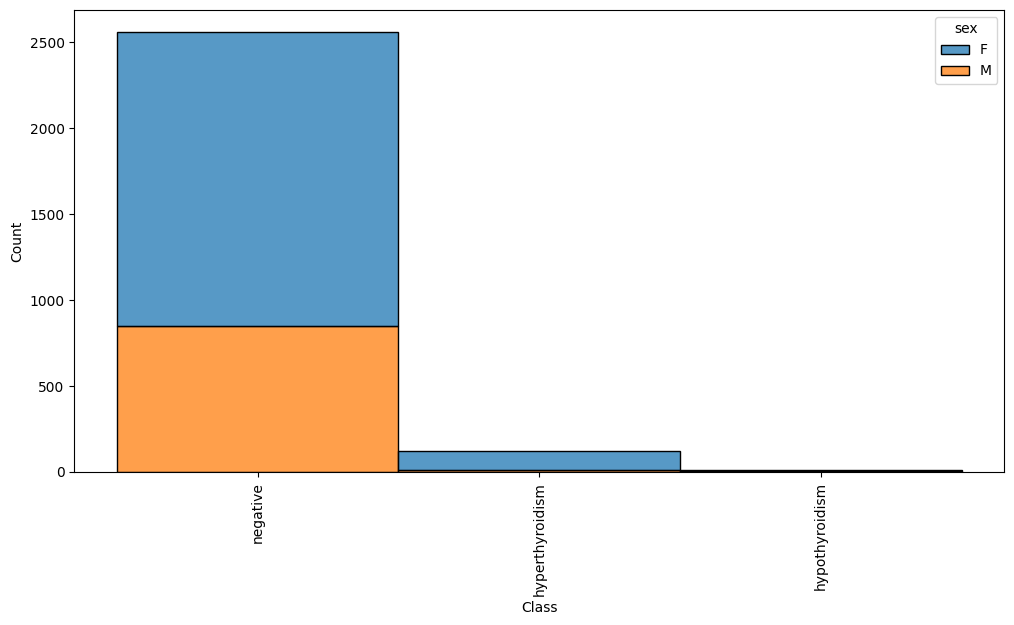

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="sex", data=df, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

<AxesSubplot:>

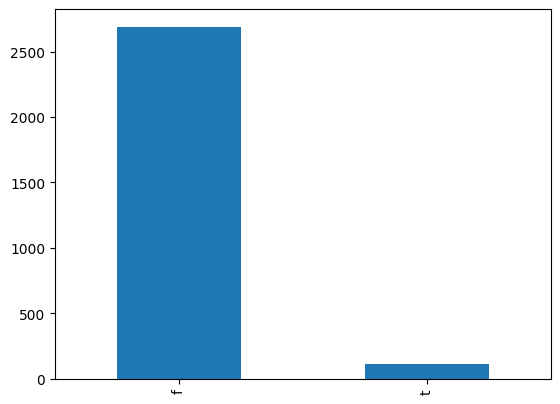

In [16]:
df["sick"].value_counts().plot(kind = "bar")

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

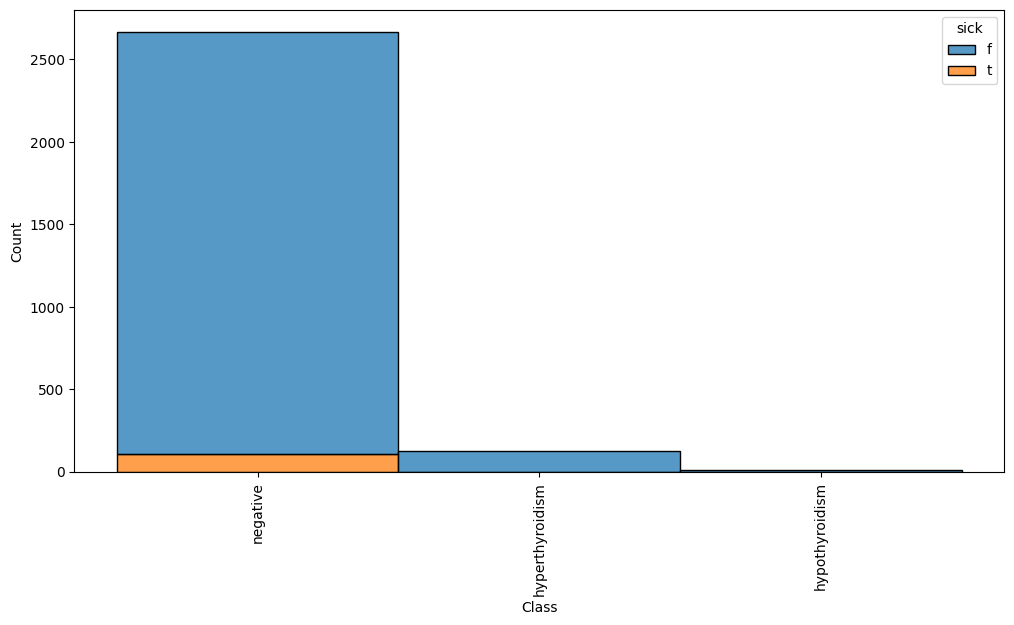

In [17]:
plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="sick", data=df, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

<AxesSubplot:>

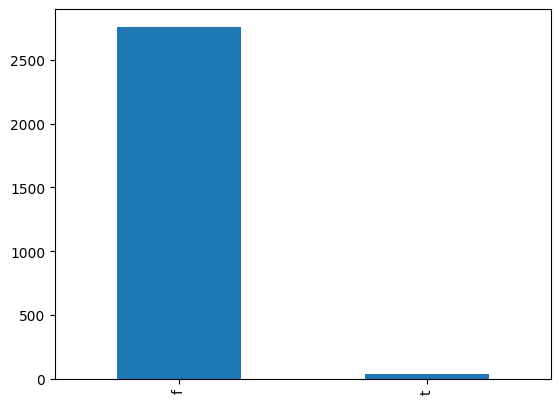

In [18]:

df["pregnant"].value_counts().plot(kind = "bar")

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

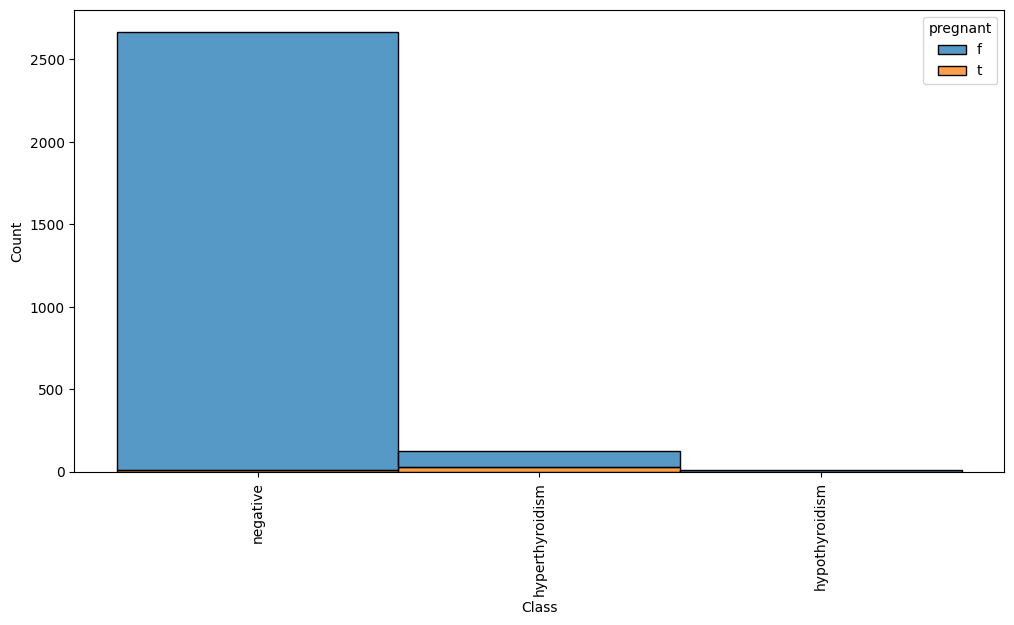

In [19]:


plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="pregnant", data=df, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

<AxesSubplot:>

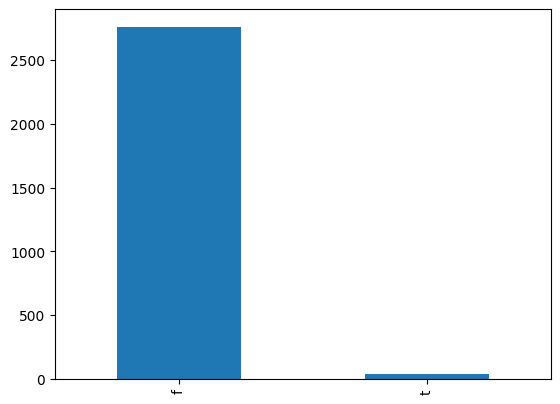

In [20]:

df["thyroid surgery"].value_counts().plot(kind = "bar")
     

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

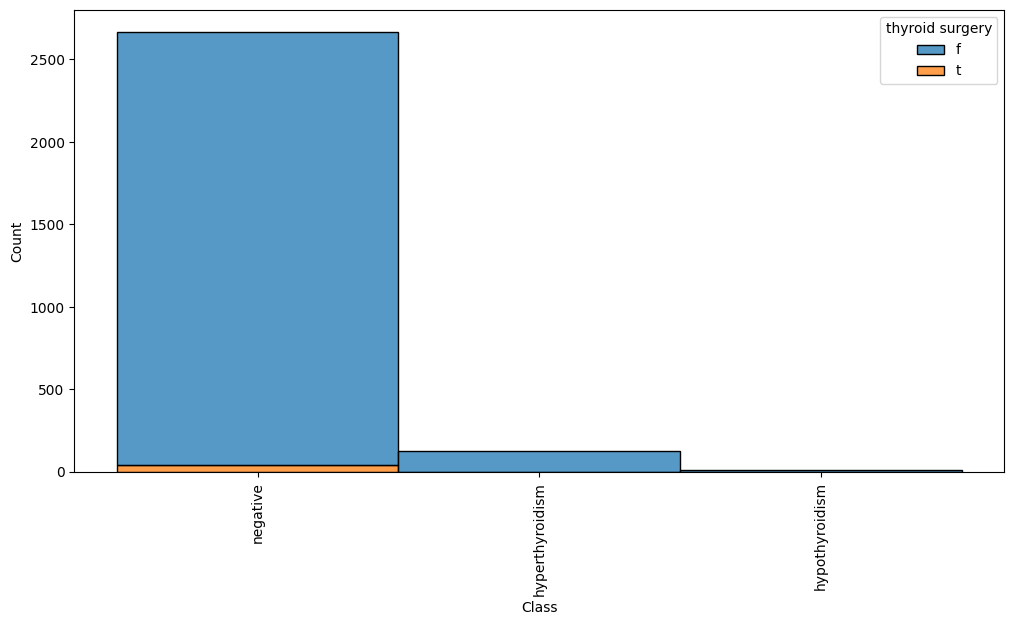

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5,x="Class", hue="thyroid surgery", data=df, stat="count",multiple="stack")
plt.xticks(rotation="vertical")